In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("hotel_bookings.csv")

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


데이터는 수치형 변수와 범주형 변수로 이루어져있는 것을 확인.

In [3]:
data.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [4]:
data['deposit_type'].describe()

count          20000
unique             3
top       No Deposit
freq           19138
Name: deposit_type, dtype: object

In [5]:
data.groupby(data['deposit_type']).mean()['adr']

deposit_type
No Deposit    101.965190
Non Refund     89.689476
Refundable     67.456154
Name: adr, dtype: float64

1) 결측치 존재여부 : 데이터를 탐색한 결과, hotel_bookings에는 결측치가 있는 변수는 3개이며, 결측치 개수는 총 1,426개이다. 결측치가 존재하는 변수들은 비율과 분포에 따라 각각 다른 결측치 대체 방식을 사용할 수 있을 것으로 보인다.\
2) 데이터 타입 설명 : 종속변수는 int형, 독립변수는 object와 int, float형태로 구성되어 있다. object 타입은 인코딩을 통해 변환해줄 필요가 있어보인다.\
3) 종속변수 특징 : object형 데이터로 구성되어있는 deposit_type변수는 20,000개의 데이터 중 19,138개의 데이터가 'No Deposit'에 해당한다. 또한 deposit_type별 adr 평균이 다르게 나타났는데 'No Deposit'의 평균 adr은 약 101, Non Refund의 평균 adr은 약 90, Refundable의 평균adr은 약 69이다.

In [6]:
data1=data['is_canceled'].value_counts()
data1

0    17600
1     2400
Name: is_canceled, dtype: int64

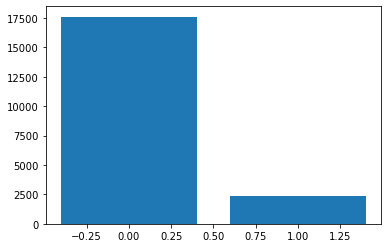

In [7]:
import matplotlib.pyplot as plt
plt.bar(data1.index, data1.values, align='center')
plt.show()

In [8]:
#import seaborn as sns
#sns.pairplot(data, diag_kind='auto', hue='is_canceled')
#plt.show()

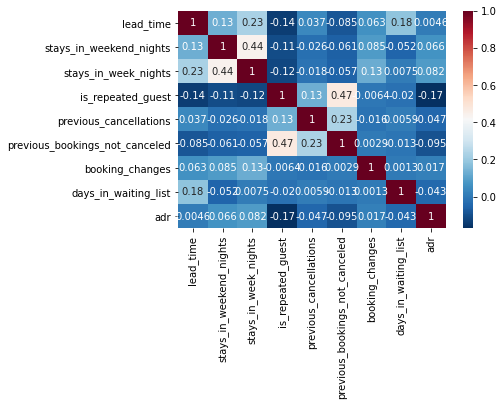

In [9]:
import seaborn as sns
data_corr=data.drop(columns='is_canceled').corr(method='pearson')
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, cmap='RdBu_r', annot=True)
plt.show()

상관관계가 0.9보다 큰 변수는 없었으므로 다중공선성은 없다고 판단함.

1-(2) 결측치를 탐색하고 결과를 제시하시오

In [10]:
data.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [11]:
data.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [12]:
print('leadtime결측치 비율:', round(5/len(data)*100,2),"%")
print('is_repeated_guest결측치 비율:', round(358/len(data)*100,2),"%")
print('adr결측치 비율:', round(1063/len(data)*100,2),"%")

leadtime결측치 비율: 0.03 %
is_repeated_guest결측치 비율: 1.79 %
adr결측치 비율: 5.32 %


In [13]:
#leadtime결측치는 1% 미만이므로 결측치가 있는 행 삭제
data_nonull=data
data_nonull.dropna(subset=['lead_time'], axis=0, inplace=True)

In [14]:
#is_repeated_guest->binary이므로 최빈값으로 대체
data_nonull['is_repeated_guest'].value_counts() #0
data_nonull['is_repeated_guest']=data_nonull['is_repeated_guest'].fillna(0)

In [15]:
#adr변수는 연속형 변수이기때문에 평균대치법
#adr그룹별 평균을 이용해 결측값 대체
fill_mean_func=lambda g: g.fillna(g.mean())
data_nonull=data_nonull.groupby('deposit_type').apply(fill_mean_func)
data_nonull

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_27020/2397761749.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fill_mean_func=lambda g: g.fillna(g.mean())


is_canceled deposit_type  lead_time  \
deposit_type                                              
No Deposit   0                0   No Deposit      105.0   
             1                0   No Deposit      303.0   
             2                0   No Deposit       33.0   
             3                0   No Deposit       48.0   
             4                0   No Deposit      216.0   
...                         ...          ...        ...   
Refundable   15249            0   Refundable      169.0   
             15428            0   Refundable      339.0   
             15661            0   Refundable      169.0   
             16644            0   Refundable      169.0   
             16851            0   Refundable      169.0   

                    stays_in_weekend_nights  stays_in_week_nights  \
deposit_type                                                        
No Deposit   0                            2                     5   
             1                            2                     2   
             2                            2                     3   
             3                            0                     1   
             4                            4                     7   
...                                     ...                   ...   
Refundable   15249                        0                     3   
             15428                        2                     5   
             15661                        1                     3   
             16644                        1                     3   
             16851                        1                     3   

                    is_repeated_guest  previous_cancellations  \
deposit_type                                                    
No Deposit   0                    0.0                       0   
             1                    0.0                       0   
             2                    0.0                       0   
             3                    0.0                       0   
             4                    0.0                       0   
...                               ...                     ...   
Refundable   15249                0.0                       0   
             15428                0.0                       0   
             15661                0.0                       0   
             16644                0.0                       0   
             16851                0.0                       0   

                    previous_bookings_not_canceled  booking_changes  \
deposit_type                                                          
No Deposit   0                                   0                1   
             1                                   0                0   
             2                                   0                0   
             3                                   0                1   
             4                                   0                2   
...                                            ...              ...   
Refundable   15249                               0                1   
             15428                               0                1   
             15661                               0                2   
             16644                               0                1   
             16851                               0                0   

                    days_in_waiting_list         adr  
deposit_type                                          
No Deposit   0                         0  131.500000  
             1                         0   73.950000  
             2                         0  101.965827  
             3                         0   80.300000  
             4                         0   60.900000  
...                                  ...         ...  
Refundable   15249                     0   66.000000  
             15428                   150   44.360000  
             15661                

In [16]:
data_nonull.index=data_nonull.index.droplevel(0)
data_nonull.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12470, 12511, 14059, 14383, 14628, 15249, 15428, 15661, 16644,
            16851],
           dtype='int64', length=19995)

In [17]:
data_nonull.sort_index(inplace=True)
data_nonull

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,0.0,0,0,1,0,131.500000
1,0,No Deposit,303.0,2,2,0.0,0,0,0,0,73.950000
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,101.965827
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.300000
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.900000
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.000000
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.000000
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.000000
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.000000


In [18]:
data_nonull.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

1-(3) 데이터의 질을 향상시킬 수 있는 방법을 제안\
: IQR 방식으로 lead_time 변수의 이상치를 보정해주어 극단적인 값을 제거함으로써 모델에 특정값이 영향을 주는 경우를 방지한다. 또는 is_repeated_guest 변수에서 [1]에 해당하는 데이터를 더 수집해 해당 변수의 불균형을 해소한다.

1-(4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_path="C:/Windows/Fonts/NGULIM.TTF"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

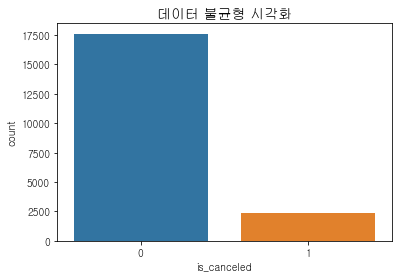

In [20]:
sns.countplot(x='is_canceled', data=data_nonull)
plt.title('데이터 불균형 시각화', fontsize=14)
plt.show()

In [21]:
ratio0=round(len(data_nonull[data_nonull['is_canceled']==0])/len(data_nonull)*100,2)
ratio1=round(len(data_nonull[data_nonull['is_canceled']==1])/len(data_nonull)*100,2)

In [22]:
ratio0

88.0

In [23]:
ratio1

12.0

s_canceled 변수는 0과 1로 구성된 binary형태의 데이터이다. 0인 데이터와 1인 데이터가 각각 88:12의 비율이므로, 0인 데이터가 전체의 90% 가까이 차지한다. 0인 관측값 수와 1인 관측값 수가 균등하게 분포하지 않기 때문에 해당 데이터는 불균형한 데이터이다.

1-(6) 오버샘플링 방식으로 Random Oversampling과 SMOTE를 선택한다. 그 이유는 Random Oversampling은 간단한 방식으로 데이터 불균형 문제를 해결할 수 있기 때문이다. SMOTE는 데이터를 생성할 때 과적합 문제를 방지할 수 있다는 점에서 선택하였다.

In [24]:
data_nonull=pd.get_dummies(data_nonull)

In [26]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time
#원본데이터
X=data_nonull[data_nonull.columns.difference(['is_canceled'])]
y=data_nonull['is_canceled']

start=time.time()
#RandomOverSampling
ros=RandomOverSampler(random_state=42)
X_ro, y_ro=ros.fit_resample(X, y)
print('time :', time.time() - start)

time : 0.09216094017028809


In [27]:
start=time.time()
sm=SMOTE(random_state=42)
X_sm, y_sm=sm.fit_resample(X, y)
print('time : ', time.time()-start)

time :  0.10331535339355469


1-(7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

start=time.time()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
clf=RandomForestClassifier(n_estimators=100, min_samples_split=10)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)

In [43]:
print("train 정확도 :", clf.score(X_train, y_train))
print(classification_report(y_test, pred))
print("time :", time.time()-start)

train 정확도 : 0.9327956989247311
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3519
           1       0.98      0.44      0.60       480

    accuracy                           0.93      3999
   macro avg       0.95      0.72      0.78      3999
weighted avg       0.93      0.93      0.92      3999

time : 77.96148371696472


In [45]:
start=time.time()
X_ro_train, X_ro_test, y_ro_train, y_ro_test=train_test_split(X_ro, y_ro, test_size=0.2, stratify=y_ro, random_state=100)
clf_ro=RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_ro.fit(X_ro_train, y_ro_train)
pred_ro=clf_ro.predict(X_ro_test)

In [46]:
print("train 정확도 :", clf.score(X_sm_train, y_sm_train))
print(classification_report(y_sm_test, pred_ro))
print("time :", time.time()-start)

NameError: name 'X_sm_train' is not defined